# Attack Pattern

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')
import os
import glob

In [3]:
# Creating the path to read the input file
home_path = os.path.expanduser("~")
data_path = home_path+"\\final\\Data\\*"

In [16]:
# Looping through each filename in above path and selecting the required file
for file in glob.glob(data_path):
    with open(file, errors='ignore') as source:
        ana_2_data = pd.read_csv(source, low_memory=False, encoding='ISO-8859-1')
        
ana_2_data = ana_2_data[np.isfinite(ana_2_data.latitude)]

ana_2_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


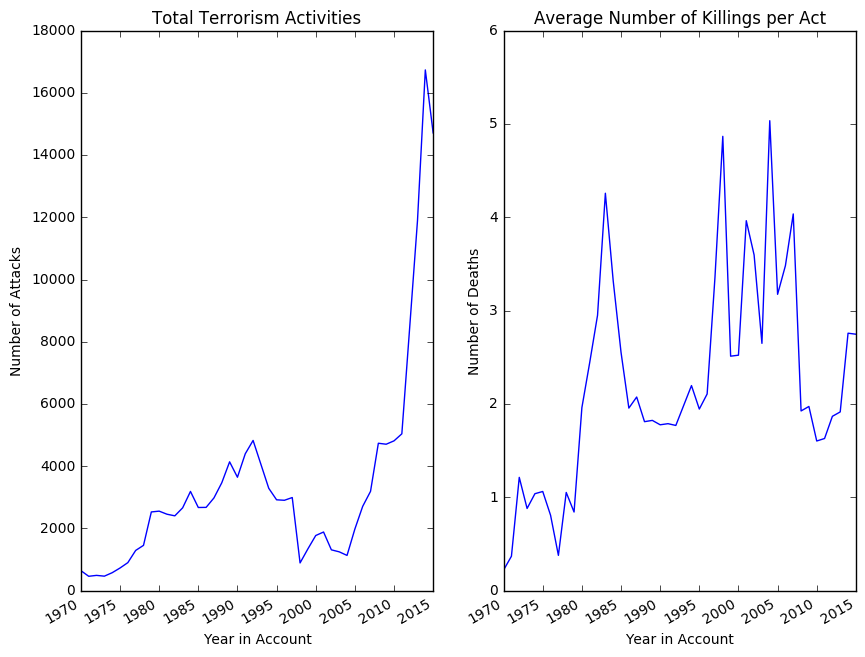

In [17]:
count_yearwise = ana_2_data.groupby(['iyear']).count()
mean_yearwise = ana_2_data.groupby(['iyear']).mean()

fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set(title = 'Total Terrorism Activities', ylabel = 'Number of Attacks', xlabel = 'Year in Account')
ax1.plot(count_yearwise.index, count_yearwise.eventid)

ax2.set(title = 'Average Number of Killings per Act', ylabel = 'Number of Deaths', xlabel = 'Year in Account')
ax2.plot(mean_yearwise.index, mean_yearwise.nkill)
fig.autofmt_xdate()

plt.savefig('ana_2\\Acts&Death.png', bbox_inches='tight')

### As we can see from the above graph, not only has the number of terrorism acts increased over time, but also the number of deaths per act has been on the rise. This could possibly due to the fact that there being more densely populated areas over time.

In [26]:
regions = list(set(ana_2_data.region_txt))
region_mean_kills = []

for region in regions:
    region_mean_kills.append(ana_2_data.nkill[ana_2_data.region_txt == region].mean())

print('Average number of people killed in each attack by Region:')
print('\n')

for i, region in enumerate(regions):
    print(region, '-->', round(region_mean_kills[i],2))

Average number of people killed in each attack by Region:


Eastern Europe --> 1.52
Australasia & Oceania --> 0.6
Central America & Caribbean --> 3.37
Central Asia --> 1.7
South America --> 1.6
Sub-Saharan Africa --> 5.17
East Asia --> 1.48
Middle East & North Africa --> 2.74
Western Europe --> 0.43
North America --> 1.48
Southeast Asia --> 1.27
South Asia --> 2.29


### We can also note, that on average, every terror attack in Sub-Saharan Africa claims over 5 lives.

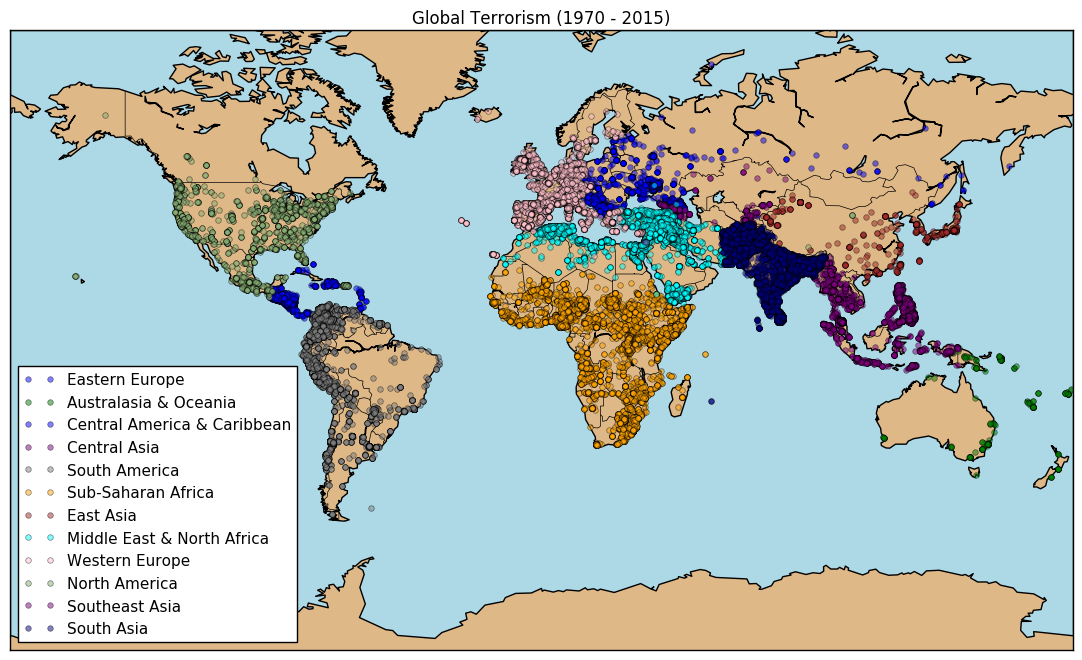

In [29]:
colors = ['blue', 'green', 'blue', 'purple', 'gray', 'orange', 'brown',\
          'aqua', 'pink', 'sage', 'purple', 'navy']

plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(ana_2_data.longitude[ana_2_data.region_txt == region].astype("float")),\
            (list(ana_2_data.latitude[ana_2_data.region_txt == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  
    
plt.title("Global Terrorism (1970 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()

plt.savefig('ana_2\\Global_Terrorism.pdf', bbox_inches='tight')

### From the graph above, we can see, that terrorism is widespread, but judging by where the points are located, and quite obviously, it mostly affects areas that are more densely populated.